<a href="https://colab.research.google.com/github/sakinjangpgc/Machine-learning-Algorithm-in-Python/blob/main/RandomForestClassifier_for_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load libraries and set option
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
#supervised learning
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics, preprocessing
df=pd.read_csv('/content/data.csv', index_col=False)
df.drop('Unnamed: 32',axis=1,inplace= True)
df.drop('id',axis=1, inplace=True)


array=df.values
x=array[:,1:31]
y=array[:,0]
#tronsform the class labels from therir orignal string representation M and B into integer
le=LabelEncoder()
y=le.fit_transform(y)
#split the dataset in train and test group
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25, random_state=7)
#To print the shape of data
xtrain.shape, ytrain.shape,xtest.shape,ytest.shape
#feature standarization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
# To reduce the daimentnality to only 20 features we have
pca=PCA(n_components=20)
pca=pca.fit(x)
print(pca)

PCA(n_components=20)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=10)
clf3.fit(xtrain, ytrain)
#analyes accuraccy of prediction on test data
classifier_score=clf3.score(xtest,ytest)
print("The classifier accuracty is {:03.2f}".format(classifier_score))

The classifier accuracty is 0.97


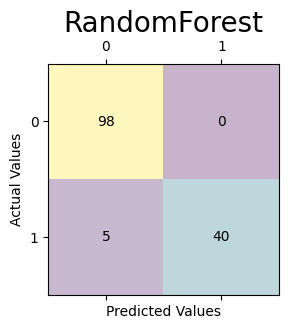

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        98
           1       1.00      0.89      0.94        45

    accuracy                           0.97       143
   macro avg       0.98      0.94      0.96       143
weighted avg       0.97      0.97      0.96       143



In [4]:
ypred=clf3.predict(xtest)
# The confusion matrix helps visualize the performance of the algorithm.
cm = metrics.confusion_matrix(ytest, ypred)

fig, axs = plt.subplots(figsize=(3, 3))
axs.matshow(cm, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         axs.text(x=j, y=i,
                s=cm[i, j],
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.title('RandomForest', size=20)
plt.show()
print(classification_report(ytest, ypred ))